In [1]:
# Importing some useful Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/character_data.csv')
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


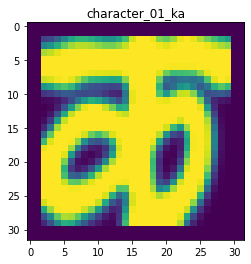

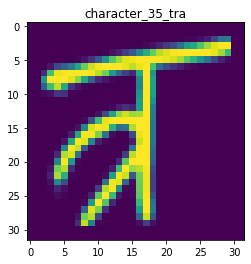

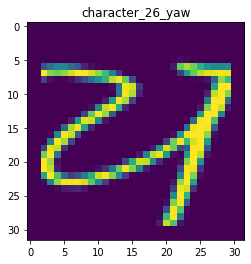

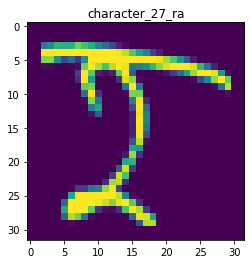

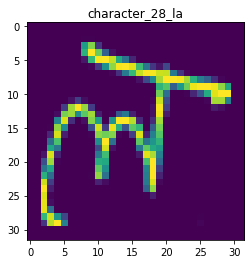

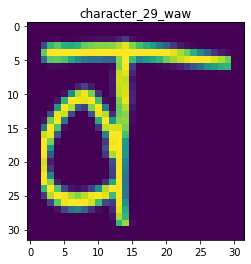

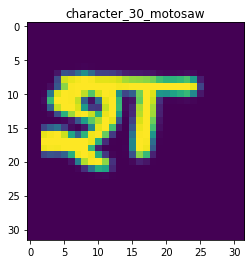

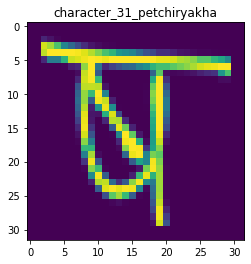

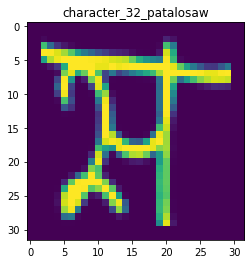

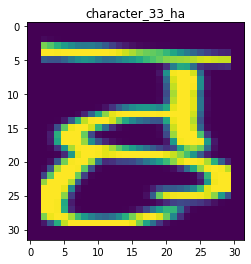

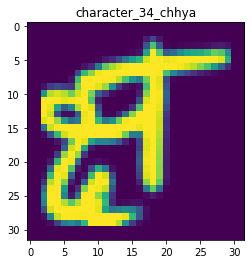

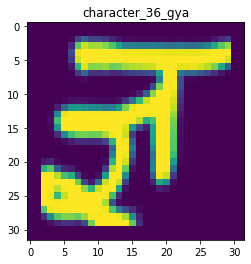

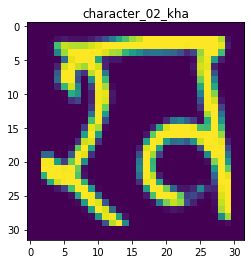

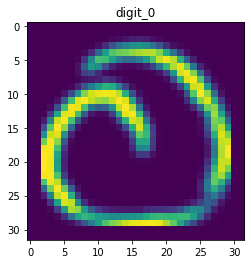

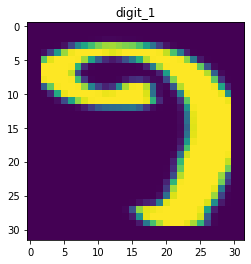

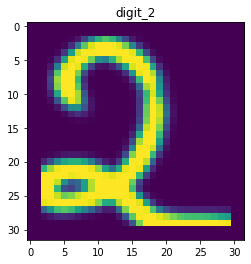

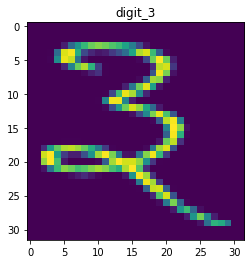

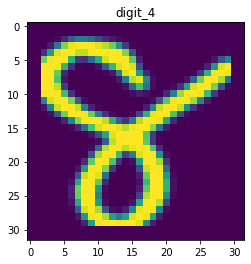

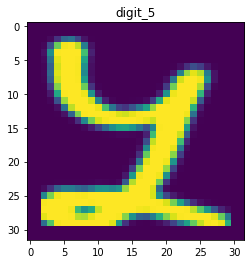

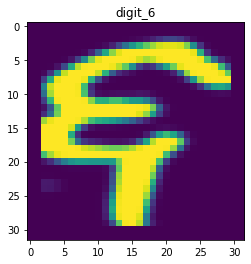

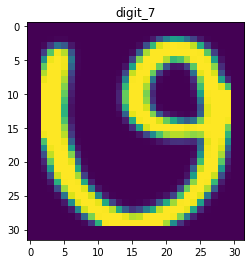

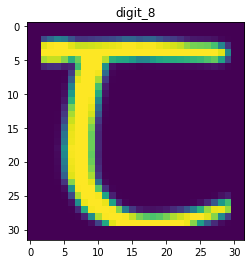

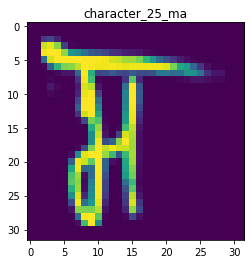

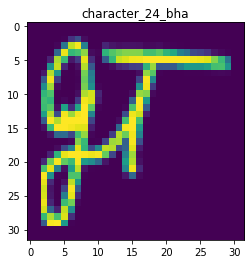

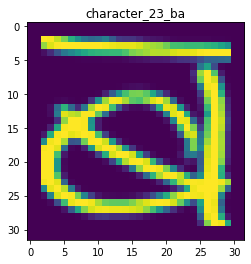

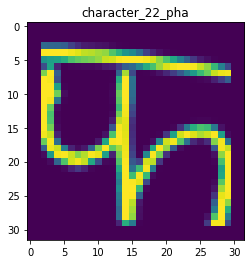

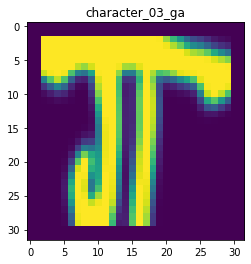

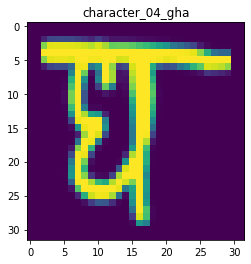

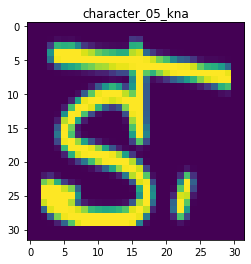

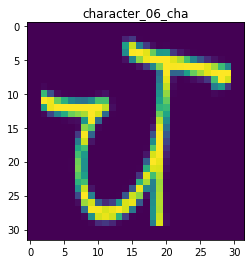

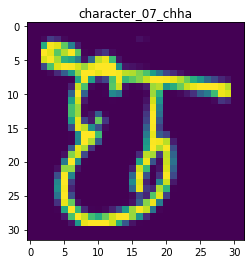

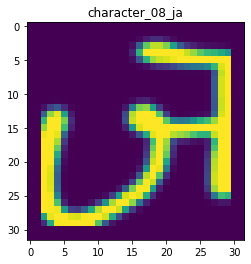

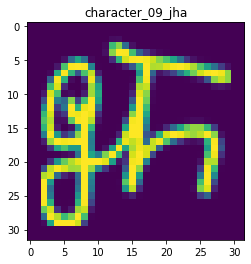

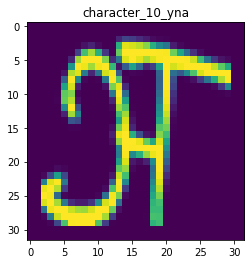

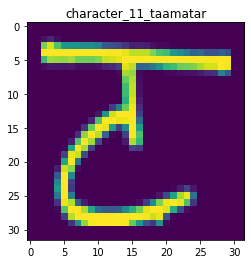

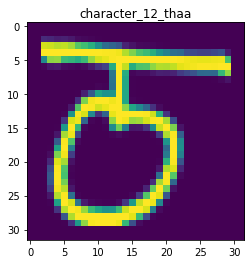

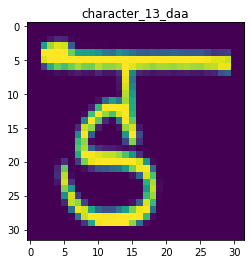

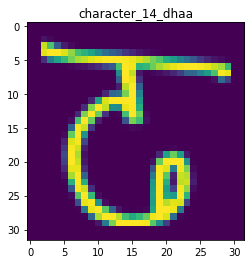

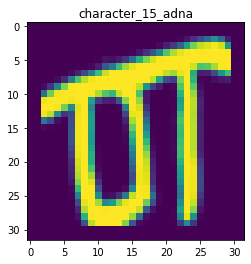

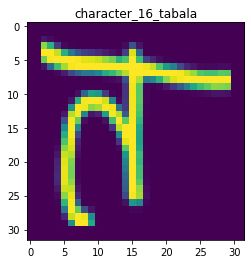

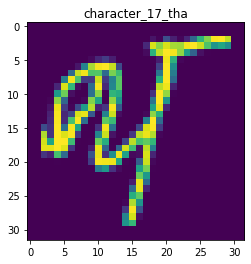

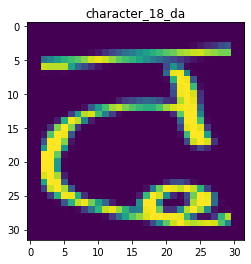

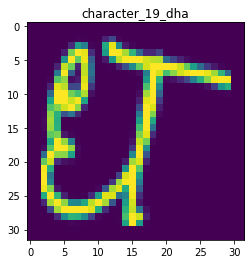

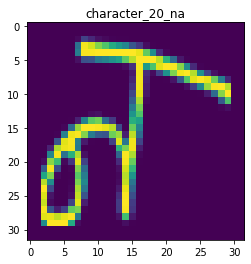

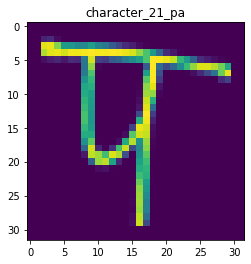

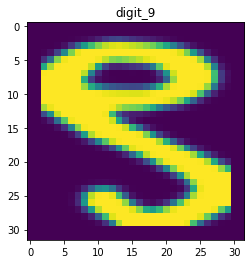

In [3]:
# Printing each character in data with its title:

char = df['character'].value_counts().index
char = char.tolist()

for name in char:
    plt.figure(figsize=(4,4))
    image = (df[df['character']==name].head(1))
    image = image.iloc[:,:-1].values.reshape(32,32).astype('int32')         # Size of img - 32x32
    plt.imshow(image)
    plt.title(name)

# Now we make a matrix

In [4]:
X = df.iloc[:,:-1]
y = df['character']

Transforming the data to feed to the model.

In [5]:
# Shape: (data.shape, size of image, feature map)
X = X.values.reshape(X.shape[0],32,32,1)

# LabelBinarizer is like one-hot-encoding 
# OneHotEncoder needs data in integer encoded form first to convert into its respective encoding which is not required in the case of LabelBinarizer.
y = LabelBinarizer().fit_transform(y)

Splitting data into train and test set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=101)

X_train, X_test = X_train/255, X_test/255

# Convolutional Layers

In [7]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), input_shape=(32,32,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.015))

model.add(Flatten())
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0

In [8]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model.fit(X_train,y_train, epochs=15)

Epoch 1/15
2300/2300 [==============================] - 94s 40ms/step - loss: 0.7624 - accuracy: 0.7868
Epoch 2/15
2300/2300 [==============================] - 91s 39ms/step - loss: 0.2902 - accuracy: 0.9134
Epoch 3/15
2300/2300 [==============================] - 91s 40ms/step - loss: 0.2041 - accuracy: 0.9392
Epoch 4/15
2300/2300 [==============================] - 89s 39ms/step - loss: 0.1592 - accuracy: 0.9526
Epoch 5/15
2300/2300 [==============================] - 89s 39ms/step - loss: 0.1303 - accuracy: 0.9603
Epoch 6/15
2300/2300 [==============================] - 90s 39ms/step - loss: 0.1105 - accuracy: 0.9657
Epoch 7/15
2300/2300 [==============================] - 88s 38ms/step - loss: 0.0951 - accuracy: 0.9698
Epoch 8/15
2300/2300 [==============================] - 92s 40ms/step - loss: 0.0841 - accuracy: 0.9730
Epoch 9/15
2300/2300 [==============================] - 90s 39ms/step - loss: 0.0726 - accuracy: 0.9774
Epoch 10/15
2300/2300 [==============================] - 89s 39m

# ACCURACY: 98%